# **Practica 8 - Ecuaciones de Fresnel.**.
Valentina Merchán Sanchez, Sergio Alejandro Prieto, Angee Vanessa Segura.  
  Mediciones de Optica y Acustica.  
  Universidad Nacional de Colombia - 2025-1

La fórmula para la difracción producida por una rendija en una dimensión es:

\begin{align}
I(x) = I_0 \left( \frac{\sin\left( \frac{\pi a x}{\lambda L} \right)}{ \frac{\pi a x}{\lambda L} } \right)^2
\end{align}

En este caso, para el experimento se utilizó un láser rojo con una longitud de onda de 
$\lambda = (650 \pm 5)\,\text{nm} = (0{,}00065 \pm 0{,}000005)\,\text{mm}$, 
y la distancia desde la rendija hasta la pantalla fue de 
$L = (475{,}3 \pm 0{,}1)\,\text{cm} = (4753 \pm 1)\,\text{mm}$.

Los mínimos de intensidad ocurren cuando el argumento del seno en el numerador es un múltiplo entero de $\pi$, es decir:

\begin{align}
\frac{\pi a x}{\lambda L} = m\pi \quad \Rightarrow \quad a = \frac{m \lambda L}{x}
\end{align}

Para el primer mínimo ($m = 1$), se obtiene:

\begin{align}
a = \frac{\lambda L}{x}
\end{align}



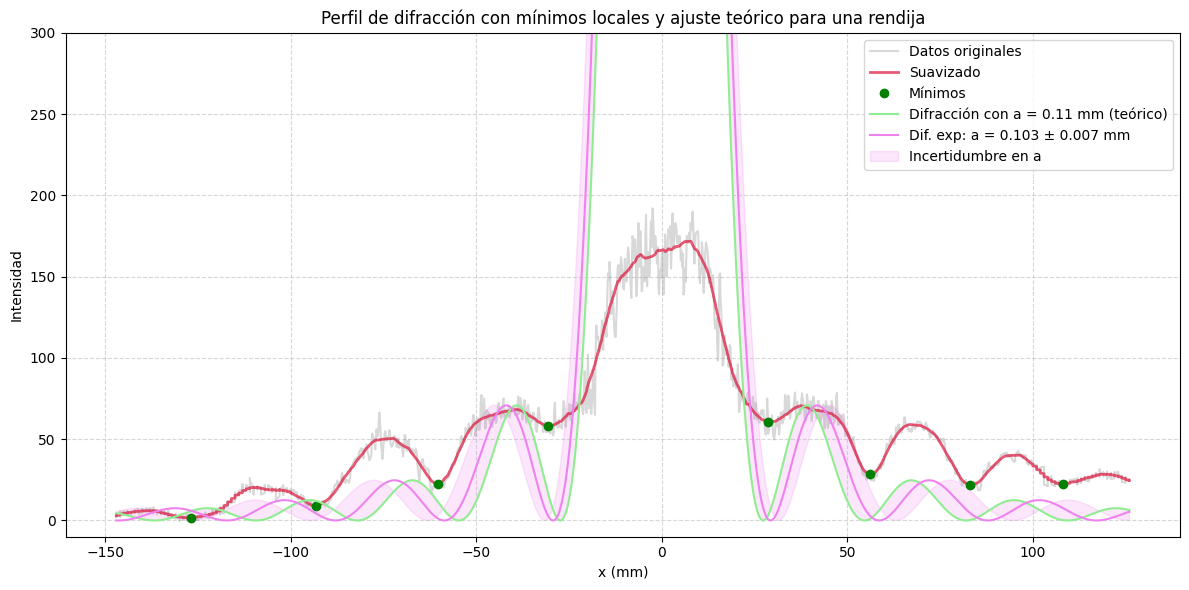

El ancho estimado de la rejilla es: 0.103 ± 0.007 mm
Discrepancia entre valor experimental y teorico 6.7%


In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter, find_peaks

# Cargar datos
df = pd.read_csv("Rendija.txt", sep='\t', decimal=',', header=None, names=["x", "y"])

# Suavizado
y_suave = savgol_filter(df.y, 101, 2)

# Encontrar mínimos
p = 1
mins, _ = find_peaks(-y_suave, prominence=p)

# Ordenar mínimos según cercanía al centro óptico (x ≈ 0)
mins = sorted(mins, key=lambda i: abs(df.x.iloc[i]))
mins = mins[2:]

# Asegurar número par de mínimos
if len(mins) % 2 != 0:
    mins = mins[:-1]

# Parámetros físicos
λ = 0.0006328  # mm
L = 4753       # mm
delta_L = 10   # mm
delta_x = 10  # mm (estimación)

# Calcular anchos y sus incertidumbres
a_vals = []
a_uncs = []
n = 1

for i in range(0, len(mins), 2):
    x1 = abs(df.x.iloc[mins[i]])
    x2 = abs(df.x.iloc[mins[i+1]])
    
    for x in [x1, x2]:
        a_i = n * λ * L / x
        da_dL = n * λ / x
        da_dx = -n * λ * L / x**2
        delta_a_i = np.sqrt((da_dL * delta_L)**2 + (da_dx * delta_x)**2)
        
        a_vals.append(a_i)
        a_uncs.append(delta_a_i)
    
    n += 1

# Promedio e incertidumbre del ancho
a = np.mean(a_vals)
delta_a = np.sqrt(np.sum(np.array(a_uncs)**2)) / len(a_uncs)



# Graficar
plt.figure(figsize=(12, 6))
plt.plot(df.x, df.y, alpha=0.3, color="gray", label="Datos originales")
plt.plot(df.x, y_suave, alpha=0.7, color="crimson", linewidth=2, label="Suavizado")

# Mínimos marcados
min_coords = np.array([[df.x.iloc[i], y_suave[i]] for i in mins])
plt.plot(min_coords[:, 0], min_coords[:, 1], "o", color="green", label="Mínimos")

# Eje teórico
x0 = np.linspace(df.x.min(), df.x.max(), 10000)
desplazamiento = 0
I0=1500
teorico = I0* (np.sinc(0.11 * (x0 + desplazamiento) / (λ * L)))**2
plt.plot(x0, teorico, color="lightgreen", label="Difracción con a = 0.11 mm (teórico)")

# Perfil experimental central y ±incertidumbre
perfil_central = I0 * (np.sinc(a * (x0 + desplazamiento) / (λ * L)))**2
perfil_mas =     I0 * (np.sinc((a + delta_a) * (x0 + desplazamiento) / (λ * L)))**2
perfil_menos =   I0 * (np.sinc((a - delta_a) * (x0 + desplazamiento) / (λ * L)))**2

# Curva central
plt.plot(x0, perfil_central, color="violet", label=f"Dif. exp: a = {a:.3f} ± {delta_a:.3f} mm")

# Banda de incertidumbre como sombra
plt.fill_between(x0, perfil_menos, perfil_mas, color="violet", alpha=0.2, label="Incertidumbre en a")

# Estética
plt.xlabel("x (mm)")
plt.ylabel("Intensidad")
plt.ylim(-10, 300)
plt.title("Perfil de difracción con mínimos locales y ajuste teórico para una rendija")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

print(f'El ancho estimado de la rejilla es: {a:.3f} ± {delta_a:.3f} mm')
print(f"Discrepancia entre valor experimental y teorico {abs((a-0.11)/0.11*100):.1f}%")


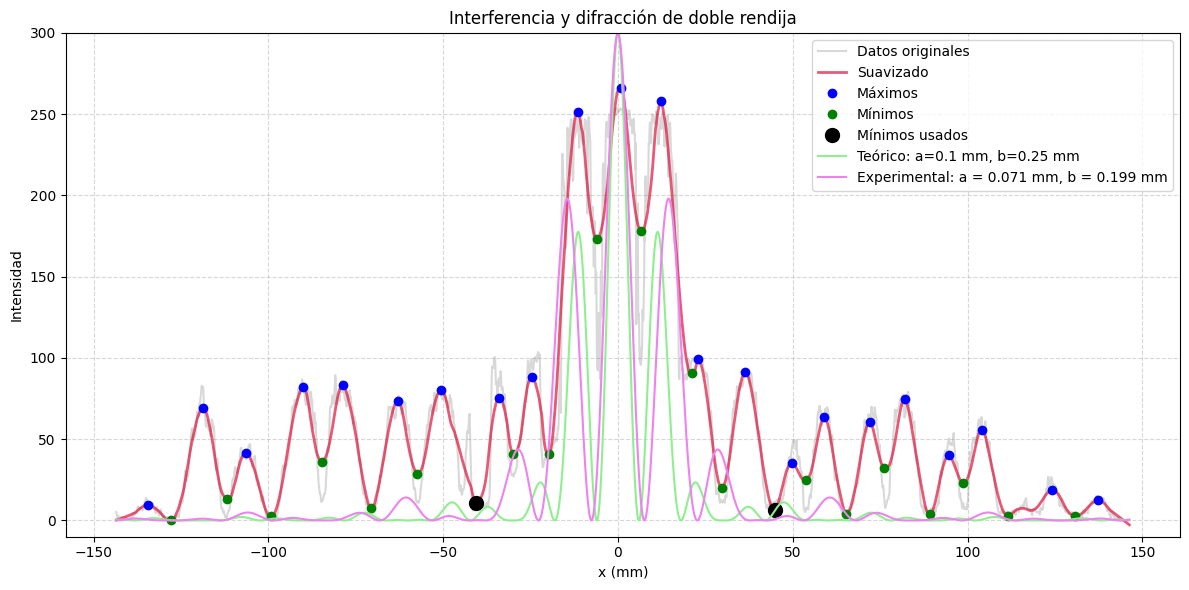


 Ancho experimental de rendija (a): 0.071 ± 0.012 mm
   Discrepancia con a_teórico=0.1 mm: 29.3%

 Separación experimental entre rendijas (b): 0.199 ± 0.012 mm
   Discrepancia con b_teórico=0.25 mm: 20.6%


In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter, find_peaks

# Cargar datos
df = pd.read_csv("DobleRendija.txt", sep='\t', decimal=',', header=None, names=["x", "y"])
y_suave = savgol_filter(df.y, 101, 2)

# Encontrar máximos y mínimos prominentes
prominencia = 8
maxs, _ = find_peaks(y_suave, prominence=prominencia)
mins, _ = find_peaks(-y_suave, prominence=prominencia)

# ---------- Cálculo de 'a' (ancho de rendija) usando mínimos específicos ----------
# Ordenar mínimos por cercanía al centro óptico
mins_ordenados = sorted(mins, key=lambda i: abs(df.x.iloc[i]))

# Usamos dos mínimos simétricos (n = 1)
min_usados = [mins_ordenados[6], mins_ordenados[7]]

# Parámetros físicos
λ = 0.0006328  # mm
L = 4753       # mm
delta_L = 10   # mm
delta_x = 10   # mm

# Calcular a y su incertidumbre
a_vals = []
a_uncs = []
n_a = 1
for idx in min_usados:
    x = abs(df.x.iloc[idx])
    a_i = n_a * λ * L / x
    da_dL = n_a * λ / x
    da_dx = -n_a * λ * L / x**2
    delta_a_i = np.sqrt((da_dL * delta_L)**2 + (da_dx * delta_x)**2)
    a_vals.append(a_i)
    a_uncs.append(delta_a_i)

a_exp = np.mean(a_vals)
delta_a = np.sqrt(np.sum(np.array(a_uncs)**2)) / len(a_uncs)

# ---------- Cálculo de 'b' (separación entre rendijas) usando máximos ----------
maxs_ordenados = sorted(maxs, key=lambda i: abs(df.x.iloc[i]))
if len(maxs_ordenados) % 2 != 0:
    maxs_ordenados = maxs_ordenados[1:]  # eliminar el máximo central

b_vals = []
b_uncs = []
n_b = 0
for i in range(0, len(maxs_ordenados), 2):
    x1 = abs(df.x.iloc[maxs_ordenados[i]])
    x2 = abs(df.x.iloc[maxs_ordenados[i+1]])
    for x in [x1, x2]:
        b_i = n_b * λ * L / x
        db_dL = n_b * λ / x
        db_dx = -n_b * λ * L / x**2
        delta_b_i = np.sqrt((db_dL * delta_L)**2 + (db_dx * delta_x)**2)
        b_vals.append(b_i)
        b_uncs.append(delta_b_i)
    n_b += 1

b_exp = np.mean(b_vals)
delta_b = np.sqrt(np.sum(np.array(b_uncs)**2)) / len(b_uncs)

# ---------- GRAFICAR ----------
plt.figure(figsize=(12, 6))
plt.plot(df.x, df.y, alpha=0.3, color="gray", label="Datos originales")
plt.plot(df.x, y_suave, alpha=0.7, color="crimson", linewidth=2, label="Suavizado")

# Máximos y mínimos generales
plt.plot(df.x.iloc[maxs], y_suave[maxs], "o", color="blue", label="Máximos")
plt.plot(df.x.iloc[mins], y_suave[mins], "o", color="green", label="Mínimos")

# Marcar mínimos usados
plt.plot(df.x.iloc[min_usados], y_suave[min_usados], "o", color="black", markersize=10, label="Mínimos usados")

# Curvas teórica y experimental
x0 = np.linspace(df.x.min(), df.x.max(), 10000)
I0 = 300

# Teórico (a=0.1 mm, b=0.25 mm)
a_teorico = 0.1
b_teorico = 0.25
perfil_teorico = I0 * (np.sinc(a_teorico * x0 / (λ * L)) * np.cos(np.pi * b_teorico * x0 / (λ * L)))**2
plt.plot(x0, perfil_teorico, color="lightgreen", label="Teórico: a=0.1 mm, b=0.25 mm")

# Experimental
perfil_exp = I0 * (np.sinc(a_exp * x0 / (λ * L)) * np.cos(np.pi * b_exp * x0 / (λ * L)))**2
plt.plot(x0, perfil_exp, color="violet", label=f"Experimental: a = {a_exp:.3f} mm, b = {b_exp:.3f} mm")

# Estética
plt.xlabel("x (mm)")
plt.ylabel("Intensidad")
plt.ylim(-10, 300)
plt.title("Interferencia y difracción de doble rendija")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# ---------- RESULTADOS ----------
print(f"\n Ancho experimental de rendija (a): {a_exp:.3f} ± {delta_a:.3f} mm")
print(f"   Discrepancia con a_teórico=0.1 mm: {abs((a_exp - 0.1)/0.1 * 100):.1f}%")

print(f"\n Separación experimental entre rendijas (b): {b_exp:.3f} ± {delta_b:.3f} mm")
print(f"   Discrepancia con b_teórico=0.25 mm: {abs((b_exp - 0.25)/0.25 * 100):.1f}%")



El ancho estimado del pelo es: 0.081 ± 0.006 mm


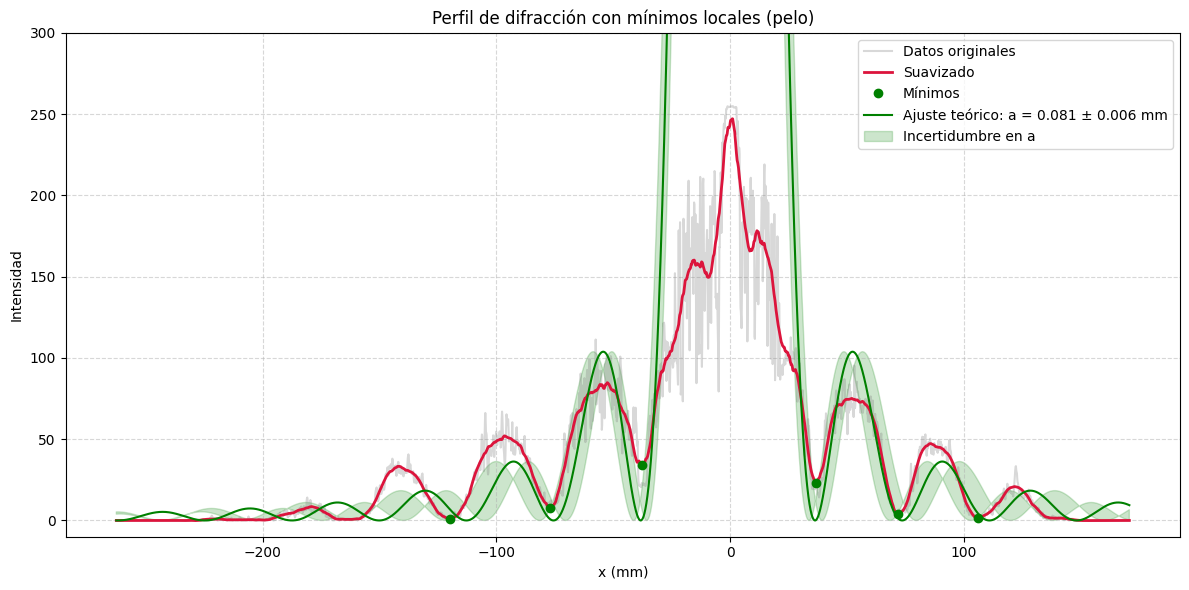

In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter, find_peaks

# Cargar datos
df = pd.read_csv("Pelo.txt", sep='\t', decimal=',', header=None, names=["x", "y"])

# Suavizado
y_suave = savgol_filter(df.y, 101, 2)

# Encontrar mínimos
p = 15
mins, _ = find_peaks(-y_suave, prominence=p)

# Ordenar mínimos según cercanía al centro óptico (x ≈ 0)
mins = sorted(mins, key=lambda i: abs(df.x.iloc[i]))

# Asegurar número par de mínimos
if len(mins) % 2 != 0:
    mins = mins[:-1]

# Parámetros físicos
λ = 0.0006328  # mm
L = 4753       # mm
delta_L = 10   # mm
delta_x = 10   # mm

# Calcular anchos y sus incertidumbres
a_vals = []
a_uncs = []
n = 1

for i in range(0, len(mins), 2):
    x1 = abs(df.x.iloc[mins[i]])
    x2 = abs(df.x.iloc[mins[i+1]])
    
    for x in [x1, x2]:
        a_i = n * λ * L / x
        da_dL = n * λ / x
        da_dx = -n * λ * L / x**2
        delta_a_i = np.sqrt((da_dL * delta_L)**2 + (da_dx * delta_x)**2)
        
        a_vals.append(a_i)
        a_uncs.append(delta_a_i)
    
    n += 1

# Promedio e incertidumbre del ancho
a = np.mean(a_vals)
delta_a = np.sqrt(np.sum(np.array(a_uncs)**2)) / len(a_uncs)

print(f'\nEl ancho estimado del pelo es: {a:.3f} ± {delta_a:.3f} mm')

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(df.x, df.y, alpha=0.3, color="gray", label="Datos originales")
plt.plot(df.x, y_suave, color="crimson", linewidth=2, label="Suavizado")

# Mínimos marcados
min_coords = np.array([[df.x.iloc[i], y_suave[i]] for i in mins])
plt.plot(min_coords[:, 0], min_coords[:, 1], "o", color="green", label="Mínimos")

# Perfil sinc ajustado y banda de incertidumbre
x0 = np.linspace(df.x.min(), df.x.max(), 10000)
desplazamiento = 1
I0 = 2200

perfil_central = I0 * (np.sinc(a * (x0 + desplazamiento) / (λ * L)))**2
perfil_mas     = I0 * (np.sinc((a + delta_a) * (x0 + desplazamiento) / (λ * L)))**2
perfil_menos   = I0 * (np.sinc((a - delta_a) * (x0 + desplazamiento) / (λ * L)))**2

# Sombra (banda de error)
perfil_sup = np.maximum(perfil_mas, perfil_menos)
perfil_inf = np.minimum(perfil_mas, perfil_menos)

plt.plot(x0, perfil_central, color="green", label=f"Ajuste teórico: a = {a:.3f} ± {delta_a:.3f} mm")
plt.fill_between(x0, perfil_inf, perfil_sup, color="green", alpha=0.2, label="Incertidumbre en a")

# Estética
plt.xlabel("x (mm)")
plt.ylabel("Intensidad")
plt.ylim(-10, 300)
plt.title("Perfil de difracción con mínimos locales (pelo)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()
